| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

SparseCategoricalCrossEntropy - labels are integers used instead of one hot encoded vectors

In [23]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # random variation in generation of points Anything beyond 0.05 is called Gaussian noise
                    random_state=42)

In [24]:
import pandas as pd
df = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
df.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [25]:
df.label.value_counts()

,count
label,
1,500
0,500


In [52]:
X_train, y_train = X[:800], y[:800] #800 samples for training
X_test, y_test = X[800:], y[800:] # 200 samples for testing
X_train.shape, X_test.shape

((800, 2), (200, 2))

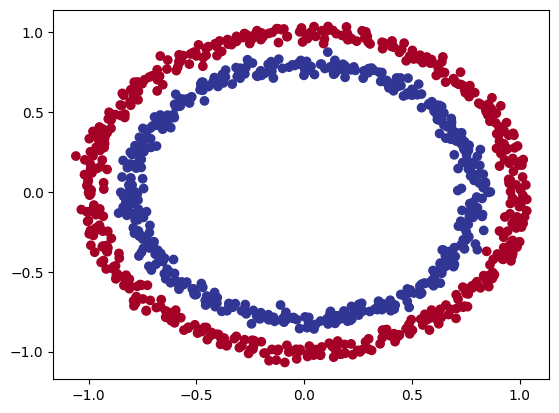

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [28]:
import tensorflow as tf

In [38]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
    ])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'accuracy',
    #patience = 5, #wait for number of epochs before it stops
    mode = 'min',
    baseline = 0.5000
)

model_1.fit(X, y, epochs = 200, callbacks = [early_stopping])

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5079 - loss: 1.8874
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5239 - loss: 0.7212 


#### Call back Functions

1. Early Stopping
2. Learning rate Scheduler
3. Modelling Checkpoints

In [39]:
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4644 - loss: 0.7313  


[0.7166628837585449, 0.4959999918937683]

In [40]:
import numpy as np

def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if model.output_shape[-1] > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classifcation...


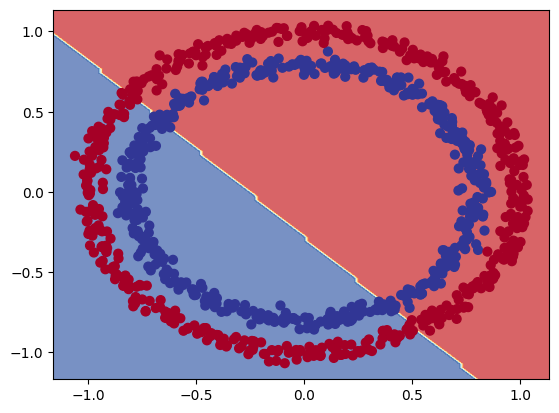

In [41]:
plot_decision_boundary(model_1,X,y)

## Model_2

In [53]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
    ])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor = 'accuracy',
#     #patience = 5, #wait for number of epochs before it stops
#     mode = 'min',
#     baseline = 0.5000
# )

model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4907 - loss: 0.6905
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5150 - loss: 0.6890
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5287 - loss: 0.6882
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5347 - loss: 0.6877
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5393 - loss: 0.6874
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5244 - loss: 0.6871
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5202 - loss: 0.6869
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5264 - loss: 0.6867
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5389 - loss: 0.6863
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5376 - loss: 0.6859
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5418 - loss: 0.6854
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accur

In [44]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9970 - loss: 0.1697  


[0.16749322414398193, 0.9980000257492065]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


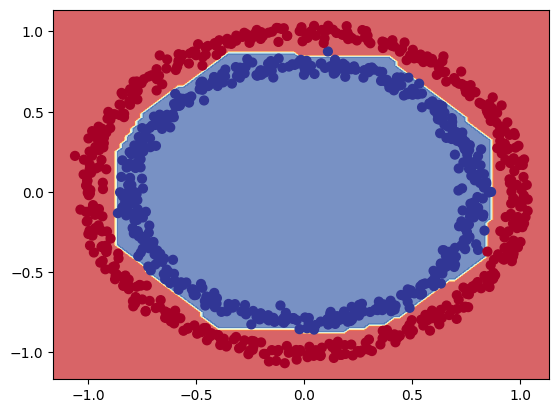

In [45]:
plot_decision_boundary(model_2,X,y)

In [46]:
def sigmoid(x):
    return 1/ (1+tf.exp(-x))

A = tf.cast(tf.range(-10,10), tf.float32)
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

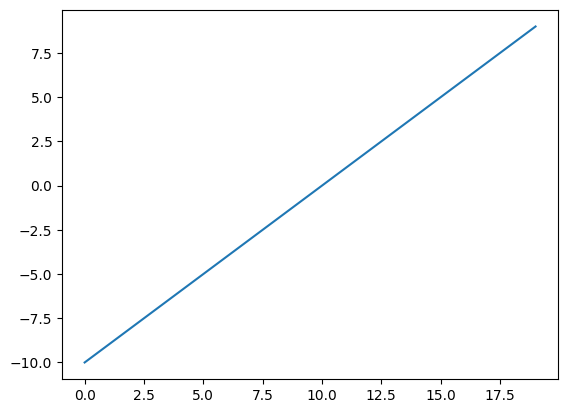

In [47]:
plt.plot(A)

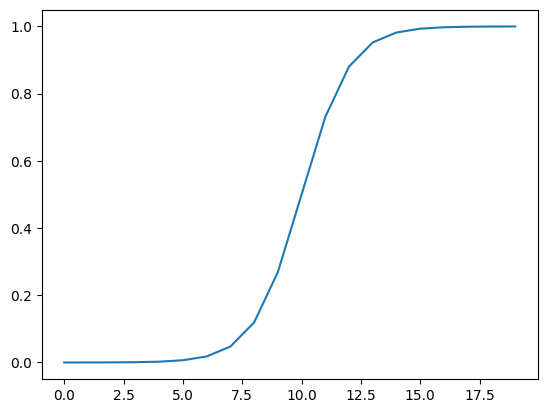

In [48]:
plt.plot(sigmoid(A))

In [49]:
def relu(x):
    return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

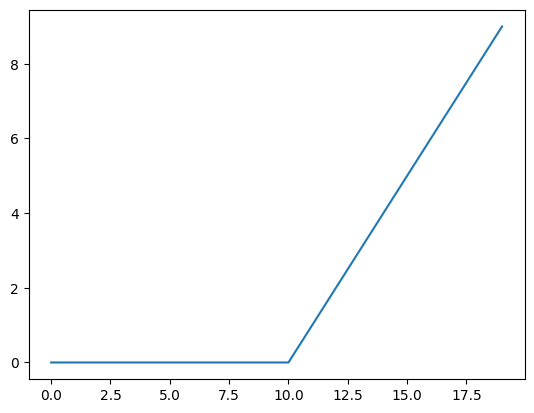

In [50]:
plt.plot(relu(A))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


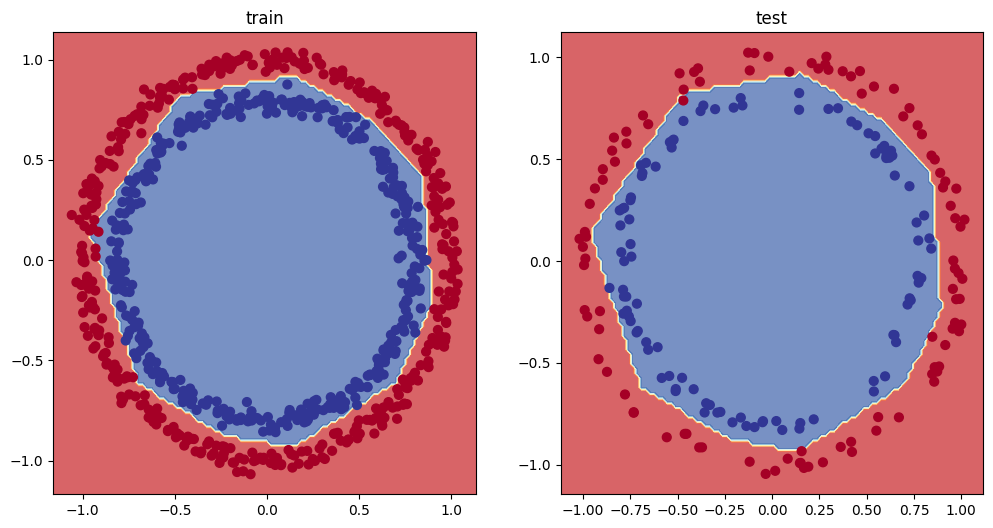

In [54]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_2, X=X_train, y = y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_2, X=X_test, y = y_test)

plt.show()

In [56]:
loss, accuracy = model_2.evaluate(X_train,y_train)
print(loss)
print(accuracy)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9977 - loss: 0.1270 
0.12810711562633514
0.9962499737739563


In [57]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
    ])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ['accuracy'])

# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor = 'accuracy',
#     #patience = 5, #wait for number of epochs before it stops
#     mode = 'min',
#     baseline = 0.5000
# )

model_3.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5016 - loss: 0.7490
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5025 - loss: 0.6930 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5288 - loss: 0.6937 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4932 - loss: 0.6932
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5083 - loss: 0.6932
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5069 - loss: 0.6932
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5007 - loss: 0.6932
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4983 - loss: 0.6932
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4979 - loss: 0.6932
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4987 - loss: 0.6931
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4963 - loss: 0.6931
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accurac

In [58]:
loss, accuracy = model_3.evaluate(X_train,y_train)
print(loss)
print(accuracy)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6649 - loss: 0.6130  
0.6254077553749084
0.643750011920929


In [59]:
loss, accuracy = model_3.evaluate(X_test,y_test)
print(loss)
print(accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6303 - loss: 0.6507  
0.6445021629333496
0.6150000095367432


In [62]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
    ])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

model_4.fit(X_train, y_train, epochs = 100, callbacks= [lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4984 - loss: 0.7291 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4984 - loss: 0.7274 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4984 - loss: 0.7256 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4984 - loss: 0.7236 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4984 - loss: 0.7216 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4984 - loss: 0.7194 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4984 - loss: 0.7172 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4984 - loss: 0.7148 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4984 - loss: 0.7125 - learning_

In [60]:
import numpy as np
def compute_lr(epoch):
    return 1e-4 * 10 **(epoch/20)

epochs = [0,10,20,40,60, 80, 100]

learning_rates = {epoch: compute_lr(epoch) for epoch in epochs}

learning_rates

{0: 0.0001,
 10: 0.000316227766016838,
 20: 0.001,
 40: 0.01,
 60: 0.1,
 80: 1.0,
 100: 10.0}